<a href="https://colab.research.google.com/github/seho-san/iced_load_detection/blob/main/blackice_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# roboflow 데이터 테스트

#디렉토리 마운팅
이 과정을 거쳐야 드라이브와 colab 환경을 연동할 수 있다

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# 디렉토리 마운팅 후에 해당 코드 다시 실행해야 함
전체 코드 작성하는 과정에서 한 번만 실행하면 됨
현재 이미 동작했기 때문에 주석처리 해 놓았음

전체 동작 과정에서 최초 1회만 동작하면 됨
만약 전체를 다시 돌릴 일이 있으면 해당 코드는 주석처리 하고 돌릴 것

In [ ]:
!git clone https://github.com/ultralytics/yolov5
# YOLOv5 레퍼지토리 clone

Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Total 17265 (delta 0), reused 0 (delta 0), pack-reused 17265 (from 1)
Receiving objects: 100% (17265/17265), 16.10 MiB | 28.19 MiB/s, done.
Resolving deltas: 100% (11861/11861), done.


####위 코드 잘못 작성했을 때 yolov5가 하위폴더로 생성되었을 때 하위에 잘못 생긴 폴더 삭제하는 코드
평상시엔 동작할 필요 없어서 주석처리 해놨음

In [ ]:
# 삭제할 디렉토리 경로
#folder_path = '/content/yolov5/yolov5'

# 디렉토리 삭제
#!rm -rf {folder_path}

# 필요한 패키지 다운로드 및 임포트

In [ ]:
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import yaml
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.6/914.6 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

# 사용할 데이터셋 경로 및 데이터셋의 yaml 파일 경로 지정
제대로 연동 안 됐으면 왼쪽 폴더 모양에서 드라이브 마운트 다시 진행
경로는 아래 작성한 코드를 ctrl+click 했을 때, 왼쪽에 해당하는 폴더가 뜨면 드라이브 마운트 정상적으로 완료된 것임

In [ ]:
data_dir = '/content/drive/MyDrive/black_ice_dataset/BLACKICE-segmentation-4'
data_yaml = '/content/drive/MyDrive/black_ice_dataset/BLACKICE-segmentation-4/data.yaml'

반드시 위의 코드도 함께 실행할 것

In [ ]:
import yaml

# YAML 파일 로드
with open(data_yaml, 'r') as f:
    film = yaml.load(f, Loader=yaml.FullLoader)  # film 변수 초기화

# train 및 val 경로 수정
film['train'] = '/content/drive/MyDrive/black_ice_dataset/BLACKICE-segmentation-4/train/images'
film['val'] = '/content/drive/MyDrive/black_ice_dataset/BLACKICE-segmentation-4/test/images'

# 수정된 내용을 다시 YAML 파일에 저장
with open(data_yaml, 'w') as f:
    yaml.dump(film, f)

# 변경된 YAML 파일 확인
print('변경된 yaml 파일:')
with open(data_yaml, 'r') as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    print(film)


변경된 yaml 파일:
{'names': ['clear-road', 'iced-road'], 'nc': 2, 'roboflow': {'license': 'MIT', 'project': 'blackice-segmentation', 'url': 'https://universe.roboflow.com/swacademy5/blackice-segmentation/dataset/4', 'version': 4, 'workspace': 'swacademy5'}, 'test': '../test/images', 'train': '/content/drive/MyDrive/black_ice_dataset/BLACKICE-segmentation-4/train/images', 'val': '/content/drive/MyDrive/black_ice_dataset/BLACKICE-segmentation-4/test/images'}


In [ ]:
!python train.py --img 416 --batch 16 --epochs 30 --data {data_yaml} --weights yolov5s.pt --cache

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-01-30 05:57:16.885552: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738216637.183241    1559 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738216637.272408    1559 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [ ]:
# 테스트 이미지 경로
test_data_dir = film['val']

# train_exp_num 지정
train_exp_num = ''

In [ ]:
!python detect.py --weights runs/train/exp{train_exp_num}/weights/best.pt --img 416 --conf 0.1 --source {test_data_dir}

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/black_ice_dataset/BLACKICE-segmentation-4/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/35 /content/drive/MyDrive/black_ice_dataset/BLACKICE-segmentation-4/test/images/3edv_png.rf.74915f2fd5b96807778919bb2f9f6034.jpg: 416x416 1 iced-road, 7.1ms
image 2/35 /content/drive/MyDrive/black_ice_dataset/BLACKICE-segmentation-4/test/images/745_p

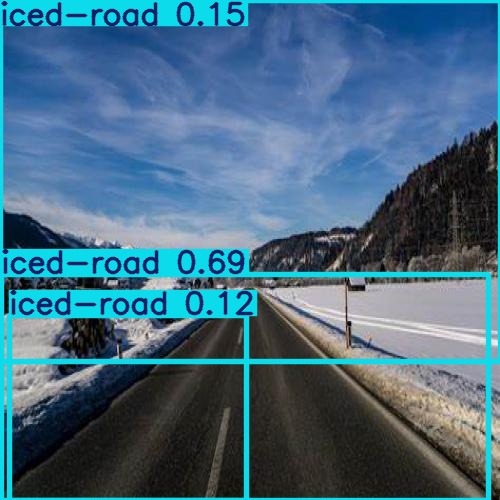

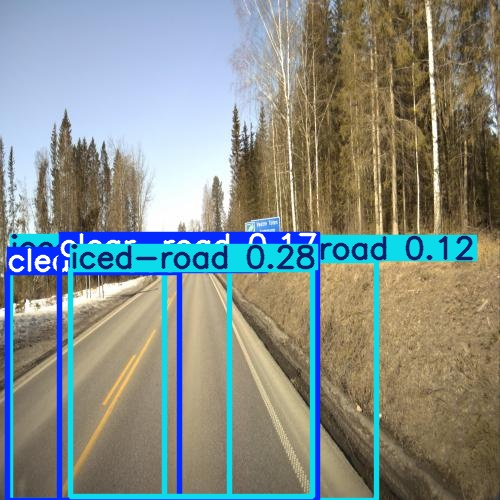

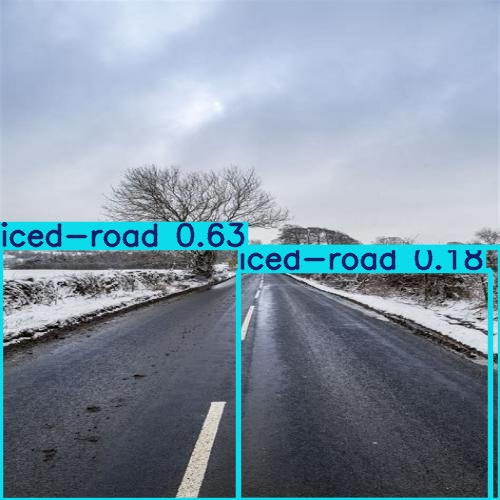

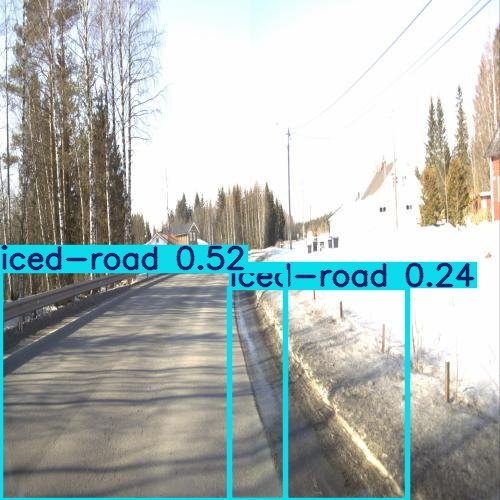

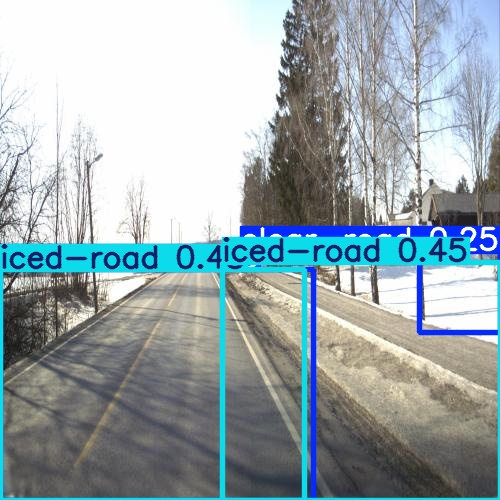

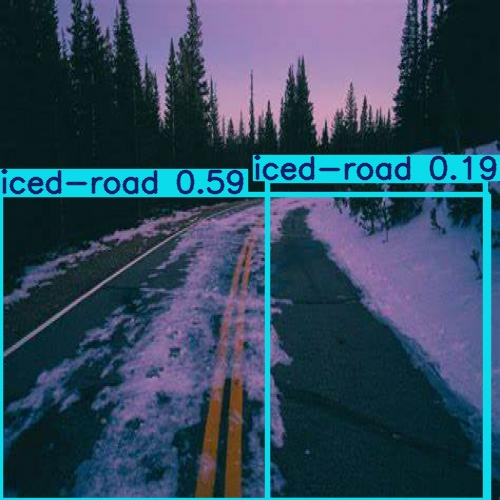

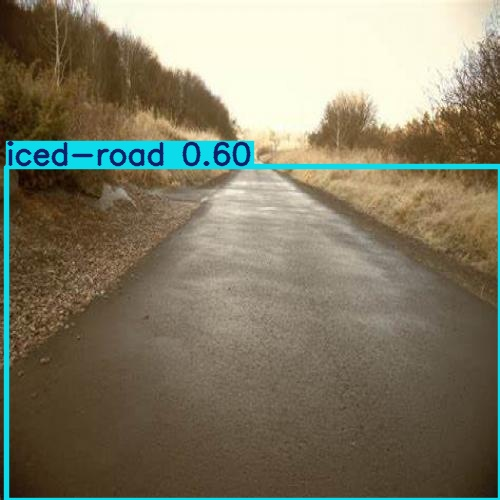

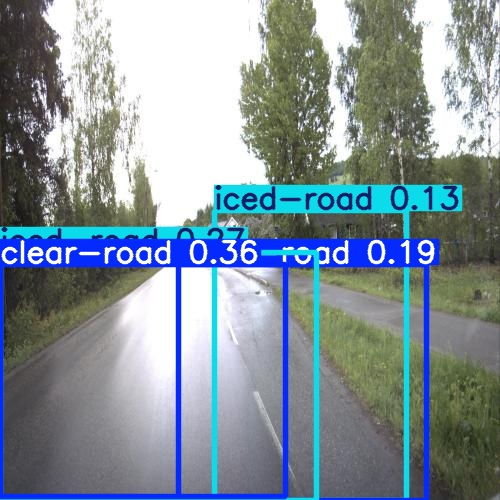

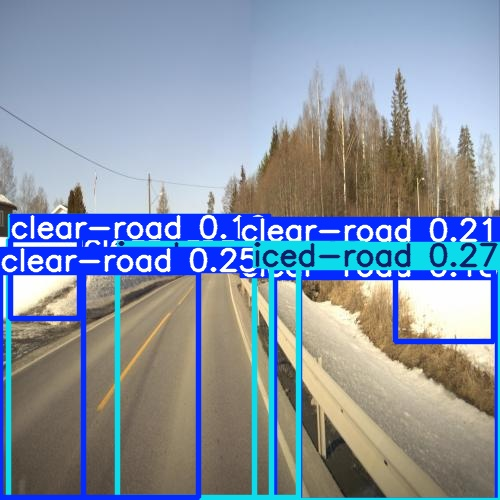

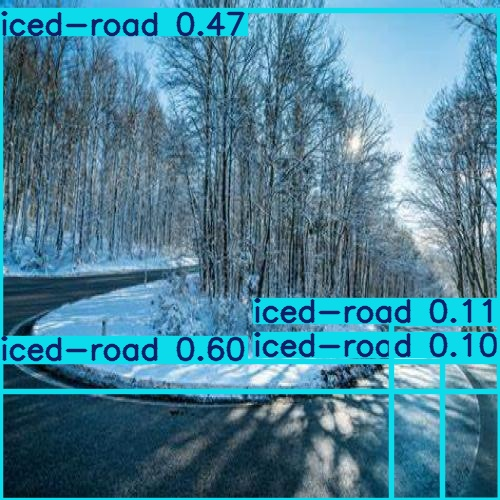

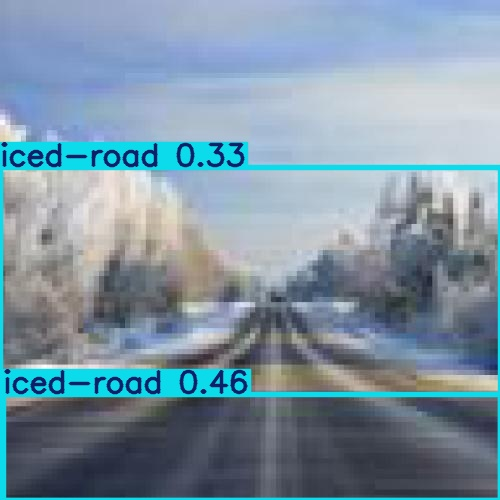

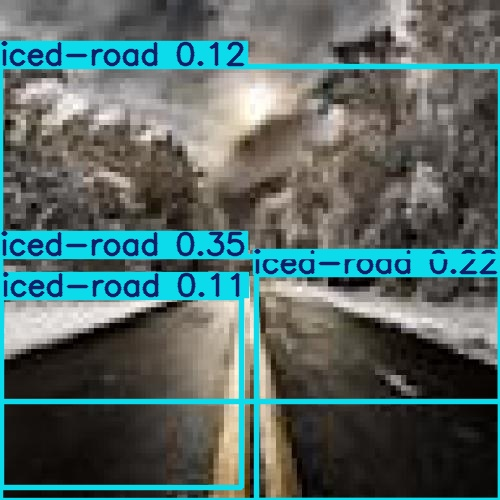

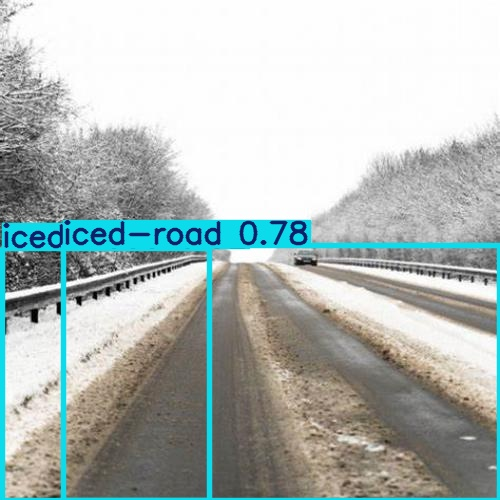

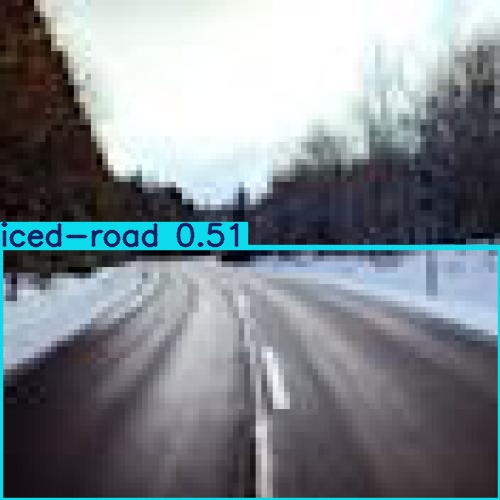

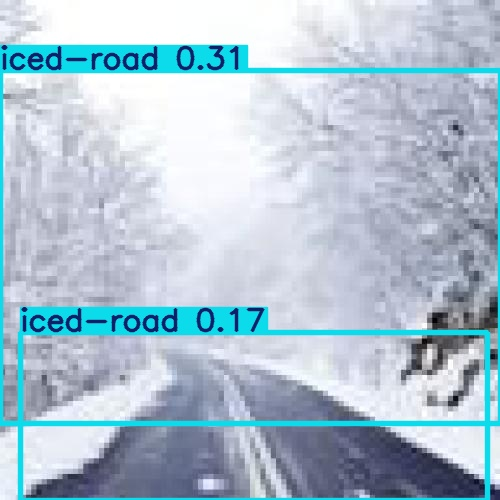

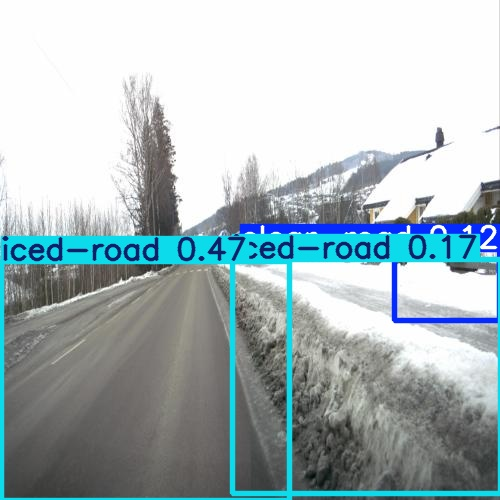

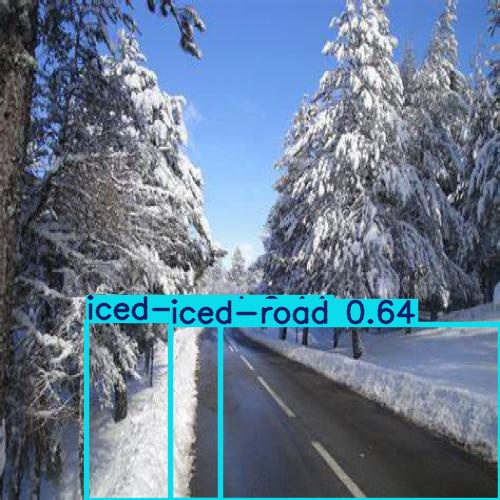

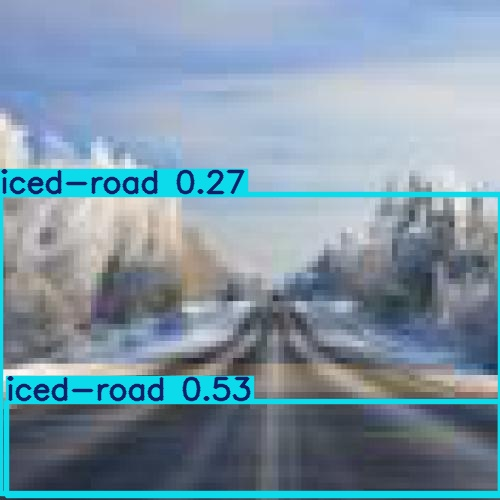

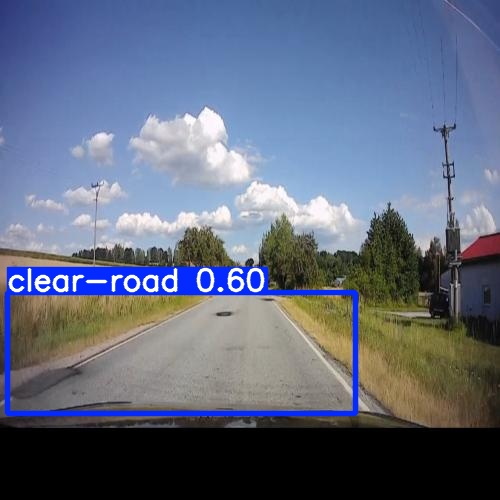

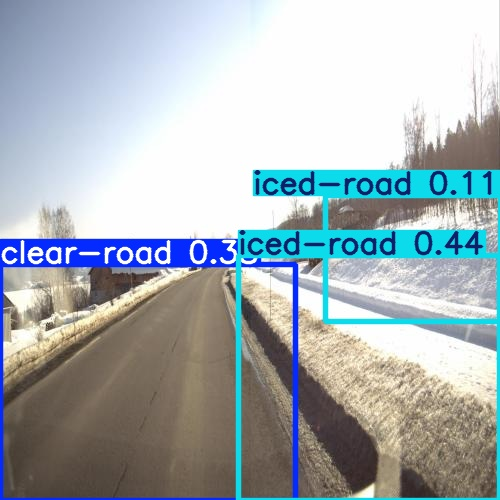

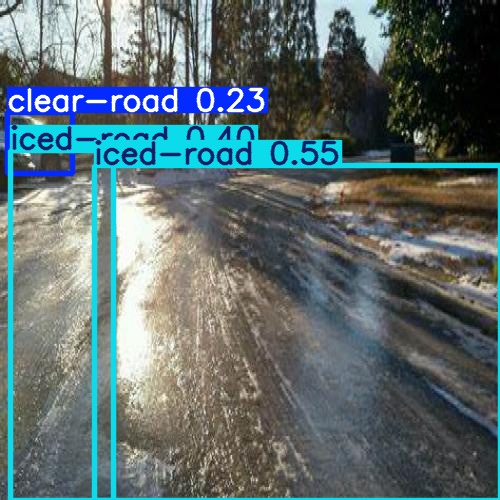

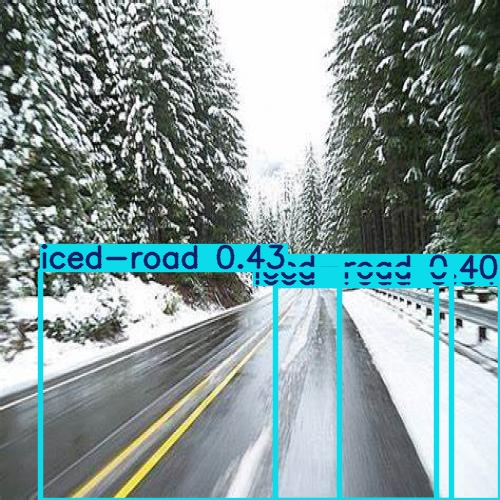

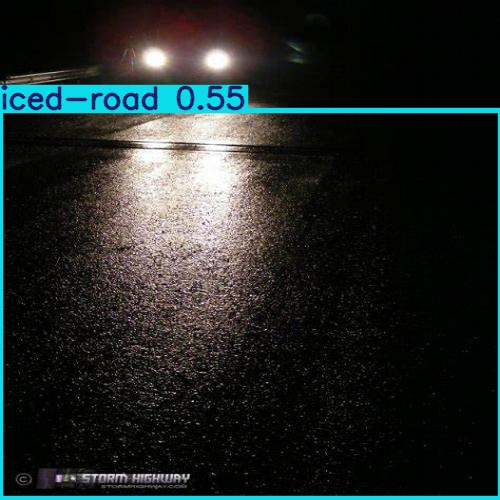

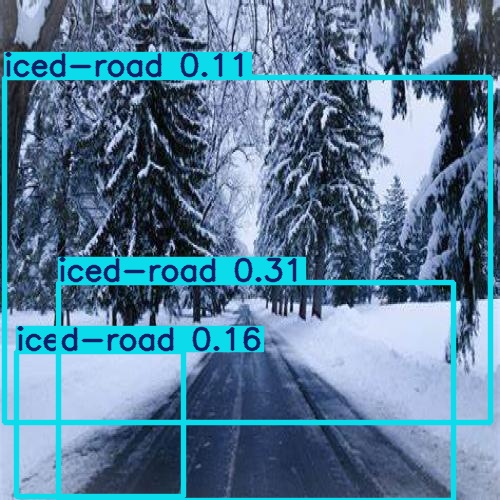

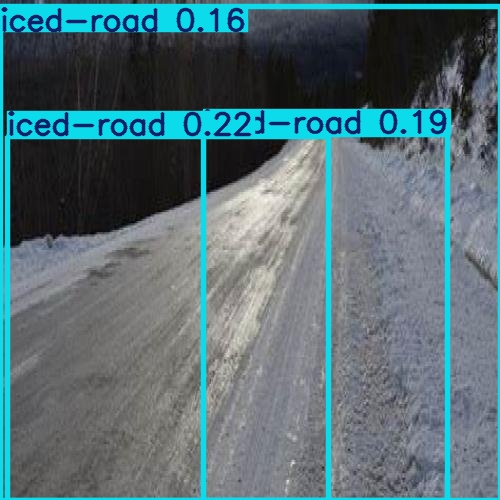

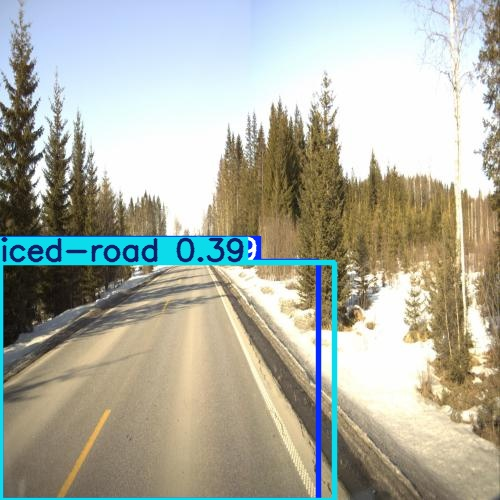

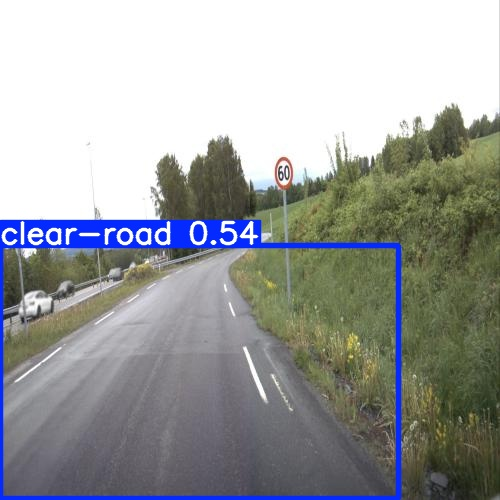

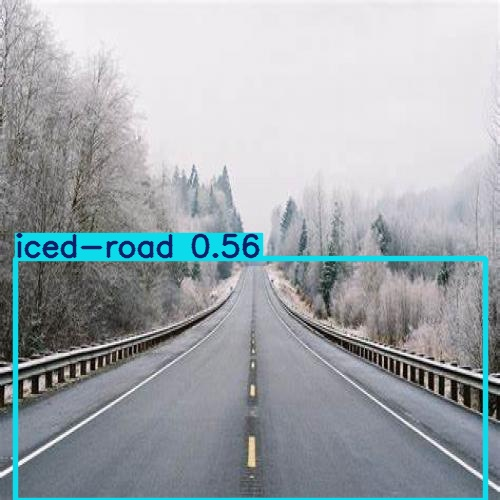

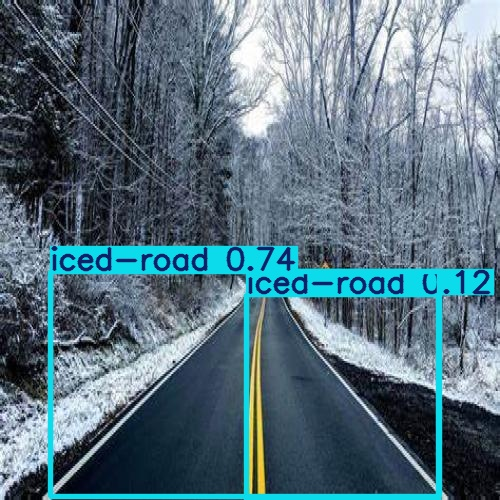

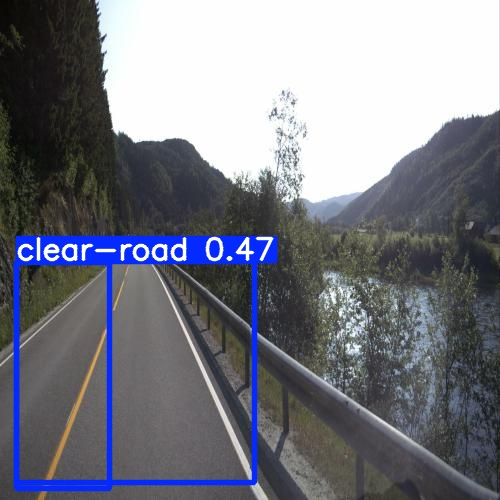

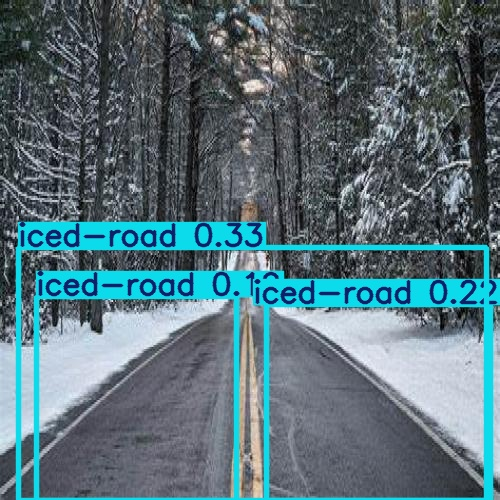

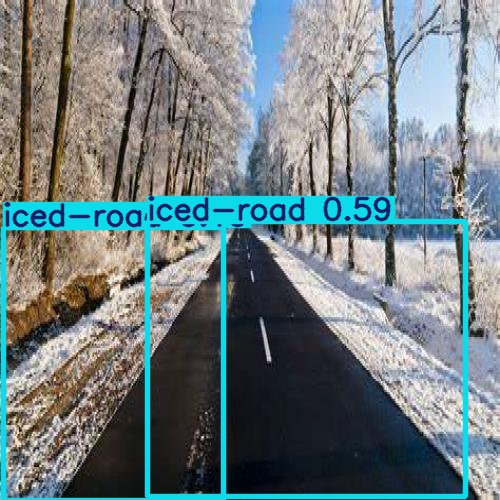

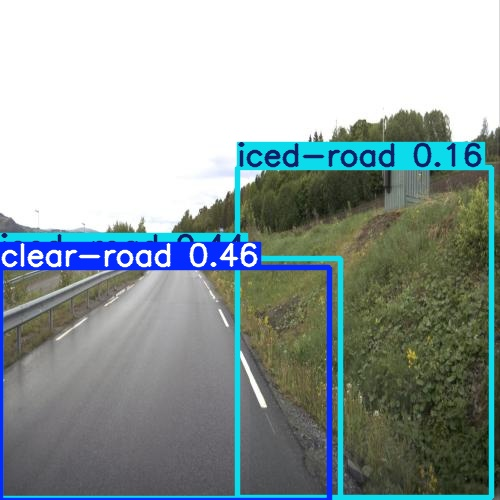

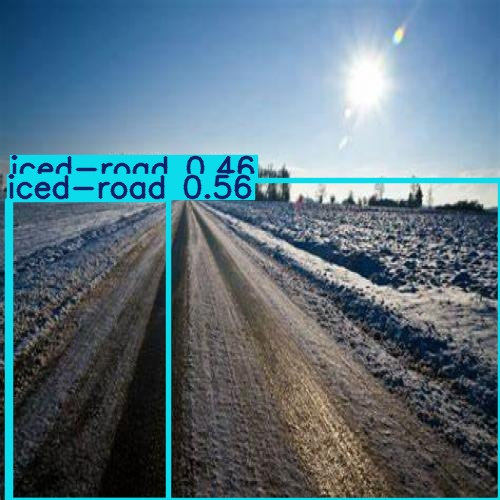

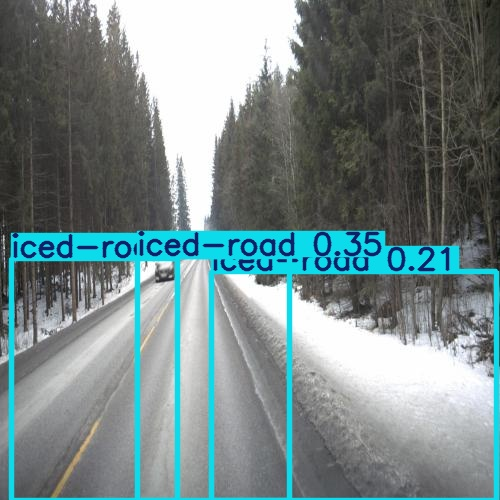

In [ ]:
# 테스트 결과 확인

import glob
from IPython.display import Image, display

test_exp_num = ''

if not os.path.exists('/content/yolov5/runs/detect/exp' + str(test_exp_num) + '/') :
  raise Exception('test_exp_num 을 다시 확인하세요.')

for imageName in glob.glob('/content/yolov5/runs/detect/exp' + str(test_exp_num) + '/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")